In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1, rc={'text.usetex': True})
sns.set_style("whitegrid")

### Reward

In [39]:
def plot_sd(df, name):
    ax = sns.lineplot(data=df,
              x='episode',
              y='reward',
              hue='game type'
              )

    ax.set(xlabel='Episode', ylabel='Average return')
    plt.show()
    #plt.savefig('{}.pdf'.format(name))
    plt.close()
    
    
def get_env_data(env, N):
    df = pd.DataFrame()
    for penalization in [False, True]:
        log_str = '{}-player-{}-penalization-{}.csv'.format(N, env, penalization)
        log_dir = os.path.join('exps', env, log_str)
        df_new = None
        if os.path.exists(log_dir):
            df_new = pd.read_csv(log_dir)
            df_new['reward'] = (df_new.reward-df_new.reward.min())/(df_new.reward.max()-df_new.reward.min())
            df_new = df_new.rename(columns={"penalization": "Game Type"})
            df_new['env'] = env
            df_new = df_new[df_new['agent']=='sum']
            df = df.append(df_new) 
    return df

### Stag Hunt

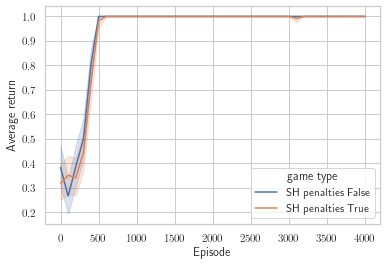

In [33]:
env = 'SH' # choose from ['PD', 'SH', 'CH', 'NPIPD']
N = 2
df = get_env_data(env, N)
plot_sd(df, env)

### Chicken

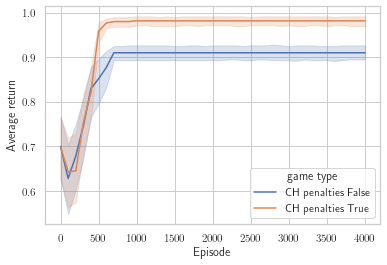

In [34]:
env = 'CH' # choose from ['PD', 'SH', 'CH', 'NPIPD']
N = 2
df = get_env_data(env, N)
plot_sd(df, env)

### Prisoner's Dilemma

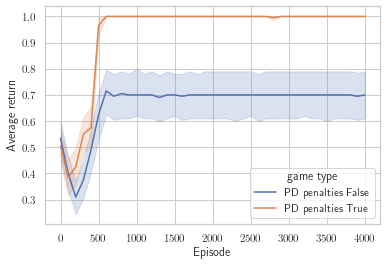

In [35]:
env = 'PD' # choose from ['PD', 'SH', 'CH', 'NPIPD']
N = 2
df = get_env_data(env, N)
plot_sd(df, env)

### NPIPD 32 Agents

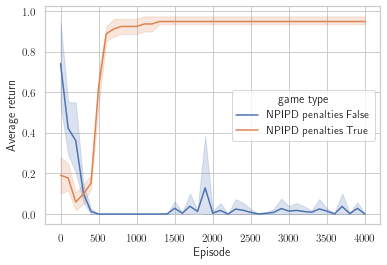

In [36]:
env = 'NPIPD' # choose from ['PD', 'SH', 'CH', 'NPIPD']
N = 32
df = get_env_data(env, N)
plot_sd(df, env)

### NPIPD 64 Agents

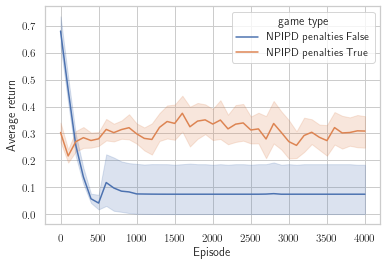

In [38]:
env = 'NPIPD' # choose from ['PD', 'SH', 'CH', 'NPIPD']
N = 64
df = get_env_data(env, N)
plot_sd(df, env)

### NPIPD 128 Agents

In [ ]:
env = 'NPIPD' # choose from ['PD', 'SH', 'CH', 'NPIPD']
N = 128
df = get_env_data(env, N)
plot_sd(df, env)